In [1]:
# 

In [2]:
import pandas as pd
import numpy as np

ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Explore Data

In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
ratings["rating"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [7]:
# checking for null values in rating data
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
# checking for null values in movie data
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
ratings["rating"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<AxesSubplot:>

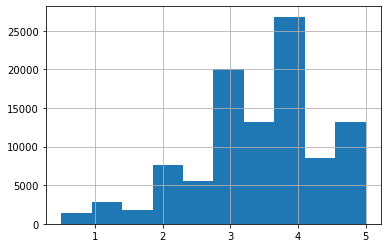

In [10]:
import matplotlib.pyplot as plt
ratings["rating"].hist()

In [11]:
# get the number of ratings given by each user
ratings.userId.value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
320      20
569      20
442      20
257      20
406      20
Name: userId, Length: 610, dtype: int64

# Join the datasets

In [12]:
# movies with a rating in the rating dataset will be joined to the ratings dataset
movies_rating = (ratings.set_index("movieId").join(movies.set_index("movieId"), how = "left"))

movies_rating.head()

,userId,rating,timestamp,title,genres
movieId,,,,,
1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,7,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,15,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,17,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [13]:
# seperate the genres as their own columns and drop unwanted columns
dummies = movies_rating["genres"].str.get_dummies()
dummies.head()



,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [14]:
df = (pd.concat([movies_rating, dummies], axis = 1).drop(["timestamp", "genres"], axis = 1))

df.head()

,userId,rating,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,1,4.0,Toy Story (1995),0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5,4.0,Toy Story (1995),0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7,4.5,Toy Story (1995),0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,15,2.5,Toy Story (1995),0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,17,4.5,Toy Story (1995),0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# put the film production years from the title in a new column
# reminder: str[-5: -1] means position -5(not included) to position -1. "minus" means count from the back
df["production_year"] = df["title"].str[-5: -1]
df.head()

,userId,rating,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,production_year
movieId,,,,,,,,,,,,,,,,,,,,,
1,1,4.0,Toy Story (1995),0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,5,4.0,Toy Story (1995),0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,7,4.5,Toy Story (1995),0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,15,2.5,Toy Story (1995),0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,17,4.5,Toy Story (1995),0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995


In [16]:
# remove the year from the title
df["title"] = df["title"].str[: -7]

In [17]:
# reset_index so that  movieId becomes a column by itself
df.reset_index(inplace = True)
df.head()

,movieId,userId,rating,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,production_year
0,1,1,4.0,Toy Story,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,1,5,4.0,Toy Story,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
2,1,7,4.5,Toy Story,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
3,1,15,2.5,Toy Story,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
4,1,17,4.5,Toy Story,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1995


# Visualize Patterns in data

In [18]:
# title vs year
# year vs. the no. of movies produced in that year
# year vs sll the genres of movies
df

,movieId,userId,rating,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,production_year
0,1,1,4.0,Toy Story,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,1,5,4.0,Toy Story,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
2,1,7,4.5,Toy Story,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
3,1,15,2.5,Toy Story,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
4,1,17,4.5,Toy Story,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,193581,184,4.0,Black Butler: Book of the Atlantic,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2017
100832,193583,184,3.5,No Game No Life: Zero,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2017
100833,193585,184,3.5,Flint,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
100834,193587,184,3.5,Bungo Stray Dogs: Dead Apple,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2018


In [19]:
# the no. of movies produced in each year
df.production_year.value_counts()

1995    6143
1994    5296
1999    4535
1996    4509
2000    4268
        ... 
998)       1
995)       1
1908       1
imal       1
973)       1
Name: production_year, Length: 127, dtype: int64

In [20]:
# checking for wrong data
df['production_year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '999)', '2005', '2006', '1902', 'lon ', '1903', '2007',
       '2008', '008)', '007)', '2009', '2010', '2011', '2012', '011)',
       '998)', '995)', '2013', '012)', '973)', '2014', '2015', '014)',
      

In [21]:
df["production_year"] = df["production_year"] .str.replace("[a-zA-Z]", "" , regex = True).str.strip()

In [22]:
df['production_year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '999)', '2005', '2006', '1902', '', '1903', '2007', '2008',
       '008)', '007)', '2009', '2010', '2011', '2012', '011)', '998)',
       '995)', '2013', '012)', '973)', '2014', '2015', '014)', '2016',
  

In [23]:
# checking for null values
df['production_year'].isnull().sum()

0

In [24]:
# removing parenthesis from the year values
df["production_year"] = df["production_year"] .str.replace("[\(...\)]", "", regex = True).str.strip()

In [25]:
df['production_year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '999', '2005', '2006', '1902', '', '1903', '2007', '2008',
       '008', '007', '2009', '2010', '2011', '2012', '011', '998', '995',
       '2013', '012', '973', '2014', '2015', '014', '2016', '2017',
   

In [26]:
# removing years with less than 4 characters
df['production_year']=df['production_year'].str.split().map(lambda x:  "  ".join(i for i in x if len(i) > 3))

In [27]:
df['production_year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '', '2005', '2006', '1902', '1903', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '1908'], dtype=object)

In [28]:
filter = df["production_year"] != ''
df = df[filter]


In [30]:
# the no. of movies produced in each year
df['production_year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', '1903', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '1908'], dtype=object)

In [31]:
# create a new dataframe for year and movie id and geteach
prodcount = (df[["production_year", "movieId"]]. groupby("production_year").count())
prodcount

,movieId
production_year,
1902,5
1903,2
1908,1
1915,1
1916,5
...,...
2014,1318
2015,1088
2016,785


In [35]:
prodcount.reset_index()

,production_year,movieId
0,1902,5
1,1903,2
2,1908,1
3,1915,1
4,1916,5
...,...,...
101,2014,1318
102,2015,1088
103,2016,785
104,2017,461


<AxesSubplot:title={'center':'count of rated movies- by production year'}, xlabel='production_year'>

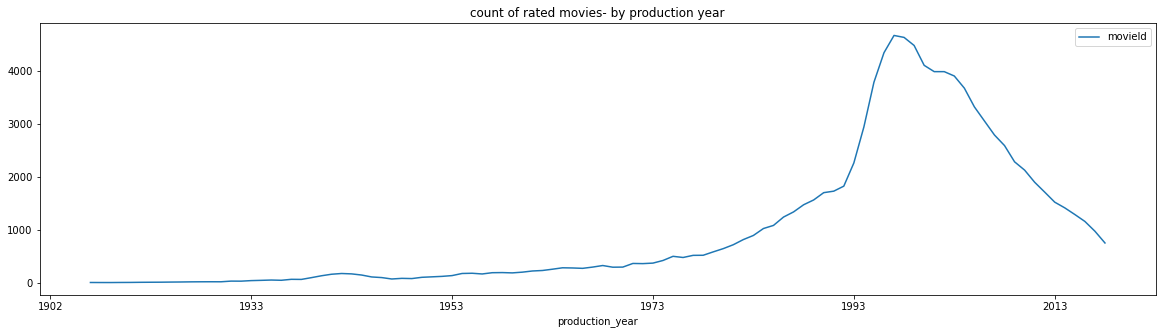

In [59]:
# 5 year running average of total productions
prodcount.rolling(5).mean().rename(columns = {}).plot(figsize = (20,5), title = "count of rated movies- by production year")

# Get the top 6 genres by the total number of movies

In [46]:
# step1: extract the genre columns
genres = df.iloc[:, 4: -1]
genres.head()

In [ ]:
# step2: sum each column
genres = genres.sum()

In [49]:
# step 3: sort the sum
genres = genres.sort_values(ascending= False)

In [51]:
# get the first 6
genres.head(6)

Drama        41923
Comedy       39049
Action       30623
Thriller     26446
Adventure    24157
Romance      18124
dtype: int64

# Get the ratings for each genre

In [60]:
genre_rating = df.iloc[:, 4:]
genre_rating.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,production_year
0,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
1,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
2,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
3,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
4,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995


In [71]:
genre_rating = genre_rating.groupby("production_year").sum()
# genre_rating.head()

In [72]:
genre_rating = genre_rating.loc["2000":"2019", genres]

KeyError: "None of [Int64Index([41923, 39049, 30623, 26446, 24157, 18124, 17233, 16679, 11831,\n             9207,  7674,  7287,  6982,  4858,  4145,  4138,  1930,  1219,\n              870,    38],\n           dtype='int64')] are in the [columns]"

<AxesSubplot:title={'center':'Total Rated Films'}>

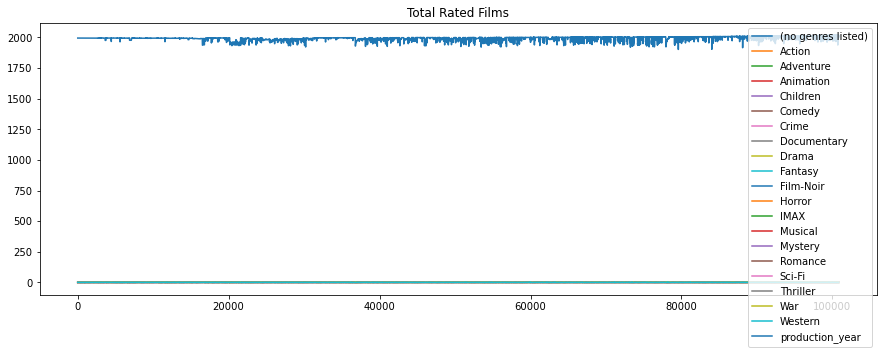

In [64]:
genre_rating.rolling(2).mean().plot(figsize=(15,5), title = "Total Rated Films")

# Split your dataset between features and target

In [33]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)